In [1]:
#  데이터 처리 모듈
import pandas as pd
from sklearn.impute import KNNImputer
# 행렬 등 통계 연산 모듈
import numpy as np
from scipy.stats import iqr
from sklearn.impute import KNNImputer
# 지수형 표기법 e를 연속형 변환
pd.options.display.float_format = '{:.4f}'.format
# 타입 어노테이션(Any, Sequence 등의 메서드 활용)
from typing import *
import os

# 구글 드라이브 마운트
from google.colab import drive
drive.mount("/content/drive")
import os

# 조합 찾는 반복문 메서드
from itertools import permutations
from itertools import combinations

# 데이터 시각화
import matplotlib.pyplot as plt
# from matplotlib.pyplot import
import matplotlib.font_manager as fm
import missingno as msno
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum

fe = fm.FontEntry(
    fname=r"/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
    # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')
# 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)
# Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})
# 폰트 설정

In [3]:
class LoadGoogleDriveData():
  def __init__(self, data = None):
    self.data = data

  def loadData(self, file_path: str, file_name_extension,
               columnTF: bool, unicode: str) -> pd.DataFrame():
    self.data = pd.read_csv(os.path.join(file_path + file_name_extension),
                            index_col = columnTF,
                            na_values = "NaN",
                            encoding = unicode)
    return self.data

  # 용량이 큰 csv 파일 읽어오기(fopen - fread와 유사한 방식)
  def loadDataWithChunking(self, file_path: str, file_name_extension,
                           chunking_row_num: int, columnTF: bool, unicode: str) -> pd.DataFrame():
    chunkdata = pd.read_csv(os.path.join(file_path + file_name_extension),
                            chunksize = chunking_row_num,
                            index_col = columnTF,
                            na_values = "NaN",
                            encoding = unicode)
    self.data = list(chunkdata)
    self.data = pd.concat(self.data)

    return self.data

In [4]:
mountInstance = LoadGoogleDriveData()

### 1.오아시스 비즈니스(필지고유번호 & 법정동읍면동코드 & 외식업종)  데이터

In [5]:
CONTEST_2023 = mountInstance.loadDataWithChunking(
    file_path = "/content/drive/MyDrive/2023BigContest/data/contest data/", file_name_extension = "소상공인 매출등급 예상 대상 필지.csv",
    unicode = "cp949", chunking_row_num = 10**5, columnTF = False)

In [6]:
CONTEST_2022 = mountInstance.loadDataWithChunking(
    file_path = "/content/drive/MyDrive/2023BigContest/data/contest data/", file_name_extension = "필지단위 소상공인 매출등급 정보.csv",
    unicode = "cp949", chunking_row_num = 10**5, columnTF = False)

### 2. KCD(상권코드 & 외식업종 중분류) 소상공인 신용데이터

In [7]:
KCD_2022_2023 = mountInstance.loadData(
    file_path = "/content/drive/MyDrive/2023BigContest/data/DESILO_PLATFORM_DATA/", file_name_extension = "SOHO_MERGE_DATA_LIST.csv",
    unicode = "utf-8", columnTF = False)

### 3. 행정동코드 - 상권코드 매핑 데이터

In [8]:
MARKET_LOC_MAP = mountInstance.loadData(
    file_path = "/content/drive/MyDrive/2023BigContest/data/",
    file_name_extension = "market_loc_map.csv",
    unicode = "euc-kr", columnTF = False)

In [9]:
MARKET_LOC_MAP

,상권_코드_2022,상권_코드_2023,행정동_코드,법정동_코드,STDG_EMD_CD
0,2110008,3110008,11110515,11110101,11110101
1,2110008,3110008,11110515,11110102,11110102
2,2110008,3110008,11110515,11110103,11110103
3,2110008,3110008,11110515,11110104,11110104
4,2110008,3110008,11110515,11110105,11110105
...,...,...,...,...,...
3453,2130102,3130102,11230750,11230110,11230110
3454,2130166,3130166,11380590,11380107,11380107
3455,2130113,3130113,11260690,11260106,11260106
3456,2130124,3130124,11290780,11290138,11290138


In [10]:
CODE = pd.merge(CONTEST_2022[["STDG_EMD_CD"]], MARKET_LOC_MAP, how = "inner")

In [30]:
KCD_MERGE_LIST = []

for index in range(len(KCD_LIST)):
  KCD_MERGE = pd.merge(left = KCD_LIST[index][["상권코드", "매출액_변동계수"]], right = CODE[["상권_코드_2022", "STDG_EMD_CD"]],
                       left_on = "상권코드", right_on = "상권_코드_2022", how = "right")
  KCD_MERGE_LIST.append(KCD_MERGE)
  KCD_MERGE = 0

In [32]:
KCD_MERGE_LIST[0] = KCD_MERGE_LIST[0].drop(["상권_코드_2022"], axis = 1)

In [33]:
KCD_MERGE_LIST[0].drop_duplicates(subset = ["STDG_EMD_CD"], inplace = True)

In [35]:
KCD_MERGE_LIST[0].isnull().sum()

상권코드           431
매출액_변동계수       431
STDG_EMD_CD      0
dtype: int64

In [74]:
KCD_MERGE_LIST[0].isnull().sum()

상권_식별자             404
상권코드               404
상권명                404
외식업종_중분류           404
배달매출액_변동계수         404
주말배달매출액_변동계수       404
손익분기점매출액_변동계수      404
사업장방문고객수_평균        404
정규고용인원_평균          404
주말카드매출액_변동계수       404
매입액_변동계수           404
사업장임대면적_변동계수       404
부가가치세_변동계수         404
객단가_변동계수           404
신규고객단가_변동계수        404
매출총이익_변동계수         404
부가세차감전영업이익_변동계수    404
프랜차이즈사업장_총합        404
소호사업장_수            404
경영위기사업장_총합         404
사업장방문신규고객수_평균      404
월임대료_변동계수          404
임대보증금_변동계수         404
매출액_변동계수           404
카드매출액_변동계수         404
사업장방문고객수_변동계수      404
사업장방문신규고객수_변동계수    404
기준분기               404
STDG_EMD_CD          0
dtype: int64

In [45]:
len(MARKET_LOC_MAP["상권_코드_2022"].unique())
len(MARKET_LOC_MAP['STDG_EMD_CD'].unique())

1622

465

### 4. 서울열린데이터광장 상권특성 공공데이터

### 5.분기별 상권특성 공공데이터 전처리

### 6. 분기별 상권별 상권특성 공공데이터 병합

### 7. 소호 신용데이터(KCD) 이상치 처리 및 결측값 대체

* KCD_NUM_LIST : 연속형 변수만 추출하여 이상치를 결측값으로 처리한 데이터의 리스트(IQR)
* KCD_IMPUTED_DATA : 유사도가 높은 컬럼별 결측값을 최근접 이웃 5개 데이터의 평균값으로 대체한 데이터의 리스트(KNN, K = 5)
* KCD_PREPROCESS_DATA : 전처리 완료된 데이터에 상권코드, 상권명, 기준일자 등 인덱스 포함한 데이터의 리스트

In [12]:
KCD_DATA = mountInstance.loadData(
    file_path = "/content/drive/MyDrive/2023BigContest/data/DESILO_PLATFORM_DATA/", file_name_extension = "KCD_DATA.csv",
    unicode = "euc-kr", columnTF = False)

In [13]:
KCD_DATA

,기준일자,상권_식별자,상권코드,배달매출액_변동계수,주말배달매출액_변동계수,손익분기점매출액_변동계수,사업장방문고객수_평균,정규고용인원_평균,주말카드매출액_변동계수,매입액_변동계수,...,경영위기사업장_총합,사업장방문신규고객수_평균,월임대료_변동계수,임대보증금_변동계수,매출액_변동계수,카드매출액_변동계수,사업장방문고객수_변동계수,사업장방문신규고객수_변동계수,상권명,외식업종_중분류
0,202201,DMC(디지털미디어시티)_카페,2120098,2.1558,2.5660,0.5387,6.3708,0.8292,1.3211,0.7483,...,0.0000,6.6692,0.5341,0.5648,0.4986,0.4845,0.7065,0.4988,DMC(디지털미디어시티),카페
1,202201,가락시장역_한식,2120234,1.8341,1.9303,0.4745,4.9360,2.3500,1.4125,0.5770,...,0.0000,3.3360,0.5646,0.5735,1.0273,1.1870,1.0395,1.0085,가락시장역,한식
2,202201,가로수길_술집,2120186,2.4496,2.4495,0.7954,3.3886,1.0431,1.6146,0.8874,...,0.0000,2.9971,1.0291,1.1673,0.8737,0.9827,1.1755,0.9964,가로수길,술집
3,202201,가로수길_일식,2120186,2.4495,2.4495,0.3542,6.6600,1.0431,0.3888,0.6522,...,0.0000,5.9857,0.3630,0.4541,0.4905,0.4996,0.8916,0.8940,가로수길,일식
4,202201,가로수길_한식,2120186,2.0289,2.0816,0.2583,9.8900,1.0431,1.0227,0.6220,...,0.0000,6.4200,0.2461,0.3202,0.6021,0.6021,0.7941,0.7777,가로수길,한식
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687,202303,홍대입구역(홍대)_한식,3120103,2.0752,1.8920,0.7577,7.5168,1.6514,1.0790,1.0970,...,3.0000,5.7888,0.6365,0.7507,0.9257,1.0410,0.7307,0.7528,홍대입구역(홍대),한식
2688,202303,선릉역_카페,3120210,2.1606,2.2517,0.5606,7.7299,1.2906,0.9155,0.7616,...,1.0000,5.3143,0.5803,0.6383,0.7098,0.7216,0.7822,0.7560,선릉역,카페
2689,202303,"신촌역(신촌역, 신촌로터리)_카페",3120094,2.1606,2.2517,0.5606,7.7299,1.2906,0.9155,0.7616,...,0.0000,5.3143,0.5803,0.6383,0.7098,0.7216,0.7822,0.7560,"신촌역(신촌역, 신촌로터리)",카페
2690,202303,"총신대입구역(이수, 총신대)_카페",3120156,2.1606,2.2517,0.5606,7.7299,1.2906,0.9155,0.7616,...,2.0000,5.3143,0.5803,0.6383,0.7098,0.7216,0.7822,0.7560,"총신대입구역(이수, 총신대)",카페


### 8. 분기별 상권데이터를 소호 신용데이터를 활용하여 월별로 확장(계절성 지수)

In [14]:
MARKET_2022_GROUPED = mountInstance.loadData(
    file_path = "/content/drive/MyDrive/2023BigContest/data/DESILO_PLATFORM_DATA/", file_name_extension = "MARKET_2022_JOIN_GROUPED.csv",
    unicode = "utf-8", columnTF = False)

In [15]:
# MARKET_2022_GROUPED.drop("2022년도_상권_코드", axis = 1, inplace = True)
MARKET_2022_GROUPED[['기준_년_코드', '기준_분기_코드']] = MARKET_2022_GROUPED[['기준_년_코드', '기준_분기_코드']].astype("str")
MARKET_2022_GROUPED["기준일자"] = MARKET_2022_GROUPED['기준_년_코드'] + MARKET_2022_GROUPED['기준_분기_코드'] + "Q"

In [16]:
MARKET_2023_GROUPED = mountInstance.loadData(
    file_path = "/content/drive/MyDrive/2023BigContest/data/DESILO_PLATFORM_DATA/", file_name_extension = "MARKET_2023_JOIN_GROUPED.csv",
    unicode = "utf-8", columnTF = False)

In [17]:
MARKET_2023_GROUPED[['기준_년_코드', '기준_분기_코드']] = MARKET_2023_GROUPED[['기준_년_코드', '기준_분기_코드']].astype("str")
MARKET_2023_GROUPED["기준일자"] = MARKET_2023_GROUPED['기준_년_코드'] + MARKET_2023_GROUPED['기준_분기_코드'] + "Q"

In [18]:
class QuartertoMonth():
  def __init__(self, KCD_dataframe, MARKET_2022, MARKET_2023, KCD_COLUMNS = None):
    self.KCD_dataframe = KCD_dataframe
    self.KCD_COLUMNS = KCD_COLUMNS
    self.MARKET_2022 = MARKET_2022
    self.MARKET_2023 = MARKET_2023

    self.dataframe_month_list = []
    self.dataframe_quarter_list = []
    self.dataframe_market_list = []

  def splitKCDQuarterData(self, base_date: str, date_time1, date_time2,
                       remove_columns: List, groupby_standard_columns: List):
    # 월별 소호 신용데이터를 분기별로 만들기 위한 집계 연산(GROUP BY)을 수행할 컬럼
    self.KCD_COLUMNS = self.KCD_dataframe.columns.tolist()
    for column in remove_columns:
      self.KCD_COLUMNS.remove(column)

    # 월별 시계열을 원소로 담는 리스트 컴프리핸션
    date_time_list = [str(date_time1 + n) for n in range(0, 12, 1)]
    date_time_list.extend([str(date_time2 + n) for n in range(0, 3, 1)])
    date_time_list = [int(date_time) for date_time in date_time_list]

    # 데이터를 월별로 분할 후 분기별로 병합하여 멤버변수로 저장
    for i in range(len(self.KCD_dataframe)):
      self.dataframe_month_list.append(
          self.KCD_dataframe[ self.KCD_dataframe[base_date].isin(date_time_list[i:i+3]) ])
    for index, quarter in zip( list(range(0, 5, 1)), ["20221Q", "20222Q", "20223Q", "20224Q", "20231Q"]):
      index_data = self.dataframe_month_list[index].groupby(groupby_standard_columns)[self.KCD_COLUMNS].sum()
      index_data.reset_index(inplace = True)
      index_data["기준분기"] = quarter
      self.dataframe_quarter_list.append(index_data)
      index_data = 0
    return self.dataframe_quarter_list

  def splitMARKETuarterData(self, base_date: str):
    for index in self.MARKET_2022[base_date].unique():
      self.dataframe_market_list.append(self.MARKET_2022[self.MARKET_2022[base_date] == index])
    self.dataframe_market_list.append(self.MARKET_2023)
    return self.dataframe_market_list

  def seasonalPattern(self, base_date: str):
    SEASONAL_PATTERN = self.KCD_dataframe.groupby([base_date])[self.KCD_COLUMNS].mean()
    SEASONAL_PATTERN = SEASONAL_PATTERN / SEASONAL_PATTERN.mean()
    SEASONAL_PATTERN.reset_index(inplace = True)
    return SEASONAL_PATTERN

In [19]:
mappingTimeseries = QuartertoMonth(KCD_dataframe = KCD_DATA,
                                   MARKET_2022 = MARKET_2022_GROUPED,
                                   MARKET_2023 = MARKET_2023_GROUPED)

In [20]:
KCD_LIST = mappingTimeseries.splitKCDQuarterData(
     base_date = "기준일자",
     date_time1 = 202201, date_time2 = 202301,
     remove_columns = ['기준일자','상권_식별자','상권코드','상권명','외식업종_중분류','소상공인연령_평균','소상공인업력_평균'],
     groupby_standard_columns = ["상권_식별자", "상권코드", "상권명", "외식업종_중분류"])

In [21]:
KCD_LIST[4]

,상권_식별자,상권코드,상권명,외식업종_중분류,배달매출액_변동계수,주말배달매출액_변동계수,손익분기점매출액_변동계수,사업장방문고객수_평균,정규고용인원_평균,주말카드매출액_변동계수,...,소호사업장_수,경영위기사업장_총합,사업장방문신규고객수_평균,월임대료_변동계수,임대보증금_변동계수,매출액_변동계수,카드매출액_변동계수,사업장방문고객수_변동계수,사업장방문신규고객수_변동계수,기준분기
0,DMC(디지털미디어시티)_카페,2120098,DMC(디지털미디어시티),카페,7.7211,8.6308,1.3804,23.0900,2.3647,3.5773,...,36.0000,5.0000,25.1202,1.2968,1.5291,1.5161,1.4997,2.1879,1.7334,20231Q
1,DMC(디지털미디어시티)_한식,2120098,DMC(디지털미디어시티),한식,6.4538,7.2218,1.2000,18.7339,2.1895,2.5800,...,15.0000,6.0000,10.2579,1.3614,2.0630,1.6436,1.6811,1.7637,1.4742,20231Q
2,가락시장역_한식,2120234,가락시장역,한식,5.8906,5.7223,1.3598,20.8133,6.6700,4.3659,...,18.0000,3.0000,14.3417,1.7078,1.6326,3.0765,2.9607,3.0595,2.9000,20231Q
3,가로수길_술집,2120186,가로수길,술집,8.4067,9.3609,2.8255,17.5771,3.2549,3.1679,...,21.0000,5.0000,15.9286,2.9667,3.0799,2.5921,2.5944,2.9112,3.0034,20231Q
4,가로수길_양식,2120186,가로수길,양식,6.3248,6.6807,0.9090,19.4810,6.1240,1.9055,...,17.0000,0.0000,17.1533,0.7824,1.0284,1.4588,1.2619,2.0606,2.0943,20231Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,홍대입구역(홍대)_술집,2120103,홍대입구역(홍대),술집,7.3129,7.9732,1.4199,32.8948,2.3799,2.6867,...,24.3720,5.1321,23.1277,2.1990,2.2900,2.3905,2.4819,3.1385,2.5872,20231Q
179,홍대입구역(홍대)_양식,2120103,홍대입구역(홍대),양식,4.5267,4.9023,1.4698,34.7678,4.0820,2.4463,...,30.0000,4.0000,30.9733,2.1694,2.9575,1.9884,2.2610,2.3637,2.5066,20231Q
180,홍대입구역(홍대)_일식,2120103,홍대입구역(홍대),일식,7.8610,8.1090,2.0017,27.5648,4.4876,2.0427,...,20.0000,0.0000,25.5271,2.4139,2.0199,1.9864,1.9959,1.9141,1.9389,20231Q
181,홍대입구역(홍대)_카페,2120103,홍대입구역(홍대),카페,6.9234,6.9002,1.0197,37.4910,3.2527,3.2004,...,41.0000,5.0000,22.8942,1.6772,1.8181,2.4259,2.5065,1.8483,2.3964,20231Q


In [22]:
MARKET_LIST = mappingTimeseries.splitMARKETuarterData(base_date = "기준일자")

In [23]:
MARKET_LIST[0]

,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,...,금요일_생활인구_수,토요일_생활인구_수,일요일_생활인구_수,상권_코드_2022,상권_코드_2023,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균,기준일자
0,2022,1,0.0000,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,124.3182,57.7273,119.0000,55.0000,20221Q
1,2022,1,1001491.0000,이태원 관광특구,3026037.0000,7.0000,3597923964.0000,892652401.0000,452992792.0000,300767570.0000,...,268472.0000,288632.0000,264405.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,20221Q
2,2022,1,1001492.0000,명동 남대문 북창동 다동 무교동 관광특구,3071908.0000,7.0000,799060474.0000,198543079.0000,109338730.0000,65537299.0000,...,622246.0000,360143.0000,291217.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,20221Q
3,2022,1,1001493.0000,동대문패션타운 관광특구,3609691.0000,7.0000,1889505008.0000,405055507.0000,242124953.0000,165935630.0000,...,478088.0000,355773.0000,312815.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,20221Q
4,2022,1,1001494.0000,종로?청계 관광특구,2228122.0000,5.0000,1880810046.0000,502934723.0000,242166818.0000,151381021.0000,...,597400.0000,415375.0000,317768.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,20221Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2022,1,3130323.0000,둔촌역전통시장,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,2116752.2000,3116752.2000,121.0000,49.0000,119.0000,55.0000,20221Q
3318,2022,1,3130324.0000,길동복조리시장,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,2114628.8750,3114628.8750,112.0000,49.0000,119.0000,55.0000,20221Q
3319,2022,1,3130325.0000,명일전통시장,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,2120551.0000,3120551.0000,116.0000,51.0000,119.0000,55.0000,20221Q
3320,2022,1,3130326.0000,고덕 골목형상점가,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,2117500.3333,3117500.3333,88.0000,60.0000,119.0000,55.0000,20221Q


In [24]:
SEASON_PATTERN = mappingTimeseries.seasonalPattern(base_date = "기준일자")

In [25]:
pd.set_option("display.max_column", None)
SEASON_PATTERN

,기준일자,배달매출액_변동계수,주말배달매출액_변동계수,손익분기점매출액_변동계수,사업장방문고객수_평균,정규고용인원_평균,주말카드매출액_변동계수,매입액_변동계수,사업장임대면적_변동계수,부가가치세_변동계수,객단가_변동계수,신규고객단가_변동계수,매출총이익_변동계수,부가세차감전영업이익_변동계수,프랜차이즈사업장_총합,소호사업장_수,경영위기사업장_총합,사업장방문신규고객수_평균,월임대료_변동계수,임대보증금_변동계수,매출액_변동계수,카드매출액_변동계수,사업장방문고객수_변동계수,사업장방문신규고객수_변동계수
0,202201,0.9564,0.9403,1.0283,0.8896,0.9341,1.0471,0.9759,0.9857,1.0235,1.0014,0.9747,1.0846,1.1379,1.0259,0.9318,0.0000,0.8081,0.9975,0.9819,1.0283,1.0127,1.0051,1.0189
1,202202,0.9463,0.9294,1.0386,0.7282,0.9521,1.0424,0.9568,0.9954,1.0477,1.0148,0.9817,1.1198,1.2125,1.0131,0.9641,1.4374,0.6889,0.9954,0.9821,1.0434,1.0384,1.0330,1.0535
2,202203,0.9631,0.9463,1.0649,0.8732,0.9560,0.9920,0.9943,0.9919,1.0448,1.0062,0.9964,1.0634,1.0810,1.0083,0.9691,1.3578,0.8323,1.0008,0.9923,1.0342,1.0246,1.0135,1.0121
3,202204,0.9669,0.9482,1.0430,1.0069,0.9614,0.9471,0.9611,0.9860,1.0300,0.9872,0.9823,0.9890,0.9838,0.9937,0.9657,1.0511,1.0550,1.0015,0.9976,0.9859,0.9931,0.9983,0.9950
4,202205,0.9459,0.9293,0.9974,1.1129,1.0043,0.9883,0.9203,0.9944,1.0091,0.9943,0.9881,0.9936,0.9728,0.9853,0.9750,0.9001,1.1702,1.0013,1.0035,0.9941,0.9944,1.0111,1.0115
5,202206,1.2375,1.4159,0.9060,1.0287,0.9557,0.7879,0.8320,0.9901,0.7101,0.9986,1.0347,0.7645,0.7561,0.9998,0.9767,0.9423,1.0849,0.9950,1.0027,0.7577,0.7308,0.7416,0.7380
6,202207,0.9833,0.9703,1.0073,1.0827,0.9546,0.9991,0.9336,0.9935,1.0152,0.9991,1.0049,1.0097,1.0002,0.9850,0.9869,1.0962,1.1216,1.0044,0.9948,1.0087,1.0122,1.0264,1.0288
7,202208,0.9956,0.9880,1.0277,1.0260,0.9774,1.0178,0.9151,0.9747,1.0105,0.9986,0.9932,1.0256,1.0115,0.9967,1.0075,1.0686,1.0470,1.0020,1.0105,1.0196,1.0188,1.0262,1.0272
8,202209,0.9933,0.9908,1.0763,1.0205,0.9845,1.0248,0.9747,1.0368,1.0294,0.9968,1.0071,0.9976,0.9876,1.0053,1.0085,0.9337,1.0380,1.0010,1.0064,1.0039,1.0070,1.0129,1.0001
9,202210,0.9962,0.9878,1.0520,1.0793,0.9694,1.0150,0.9597,1.0259,1.0197,0.9978,1.0012,1.0037,0.9970,0.9908,1.0598,0.9768,1.0832,0.9969,0.9975,1.0164,1.0238,1.0089,1.0211


In [26]:
MERGE_LIST = []

for index in range(0, 5, 1):
  merge_data = pd.merge(
      left = KCD_LIST[index], right = MARKET_LIST[index],
      left_on = "상권코드", right_on = "상권_코드",
      how = "outer")
  MERGE_LIST.append(merge_data)

In [27]:
KCD_LIST[0]["상권코드"]

0      2120098
1      2120098
2      2120234
3      2120186
4      2120186
        ...   
171    2120103
172    2120103
173    2120103
174    2120103
175    2120103
Name: 상권코드, Length: 176, dtype: int64

In [28]:
MARKET_LIST[0]["상권_코드"]

0            0.0000
1      1001491.0000
2      1001492.0000
3      1001493.0000
4      1001494.0000
           ...     
3317   3130323.0000
3318   3130324.0000
3319   3130325.0000
3320   3130326.0000
3321   3130327.0000
Name: 상권_코드, Length: 3322, dtype: float64

<Axes: >

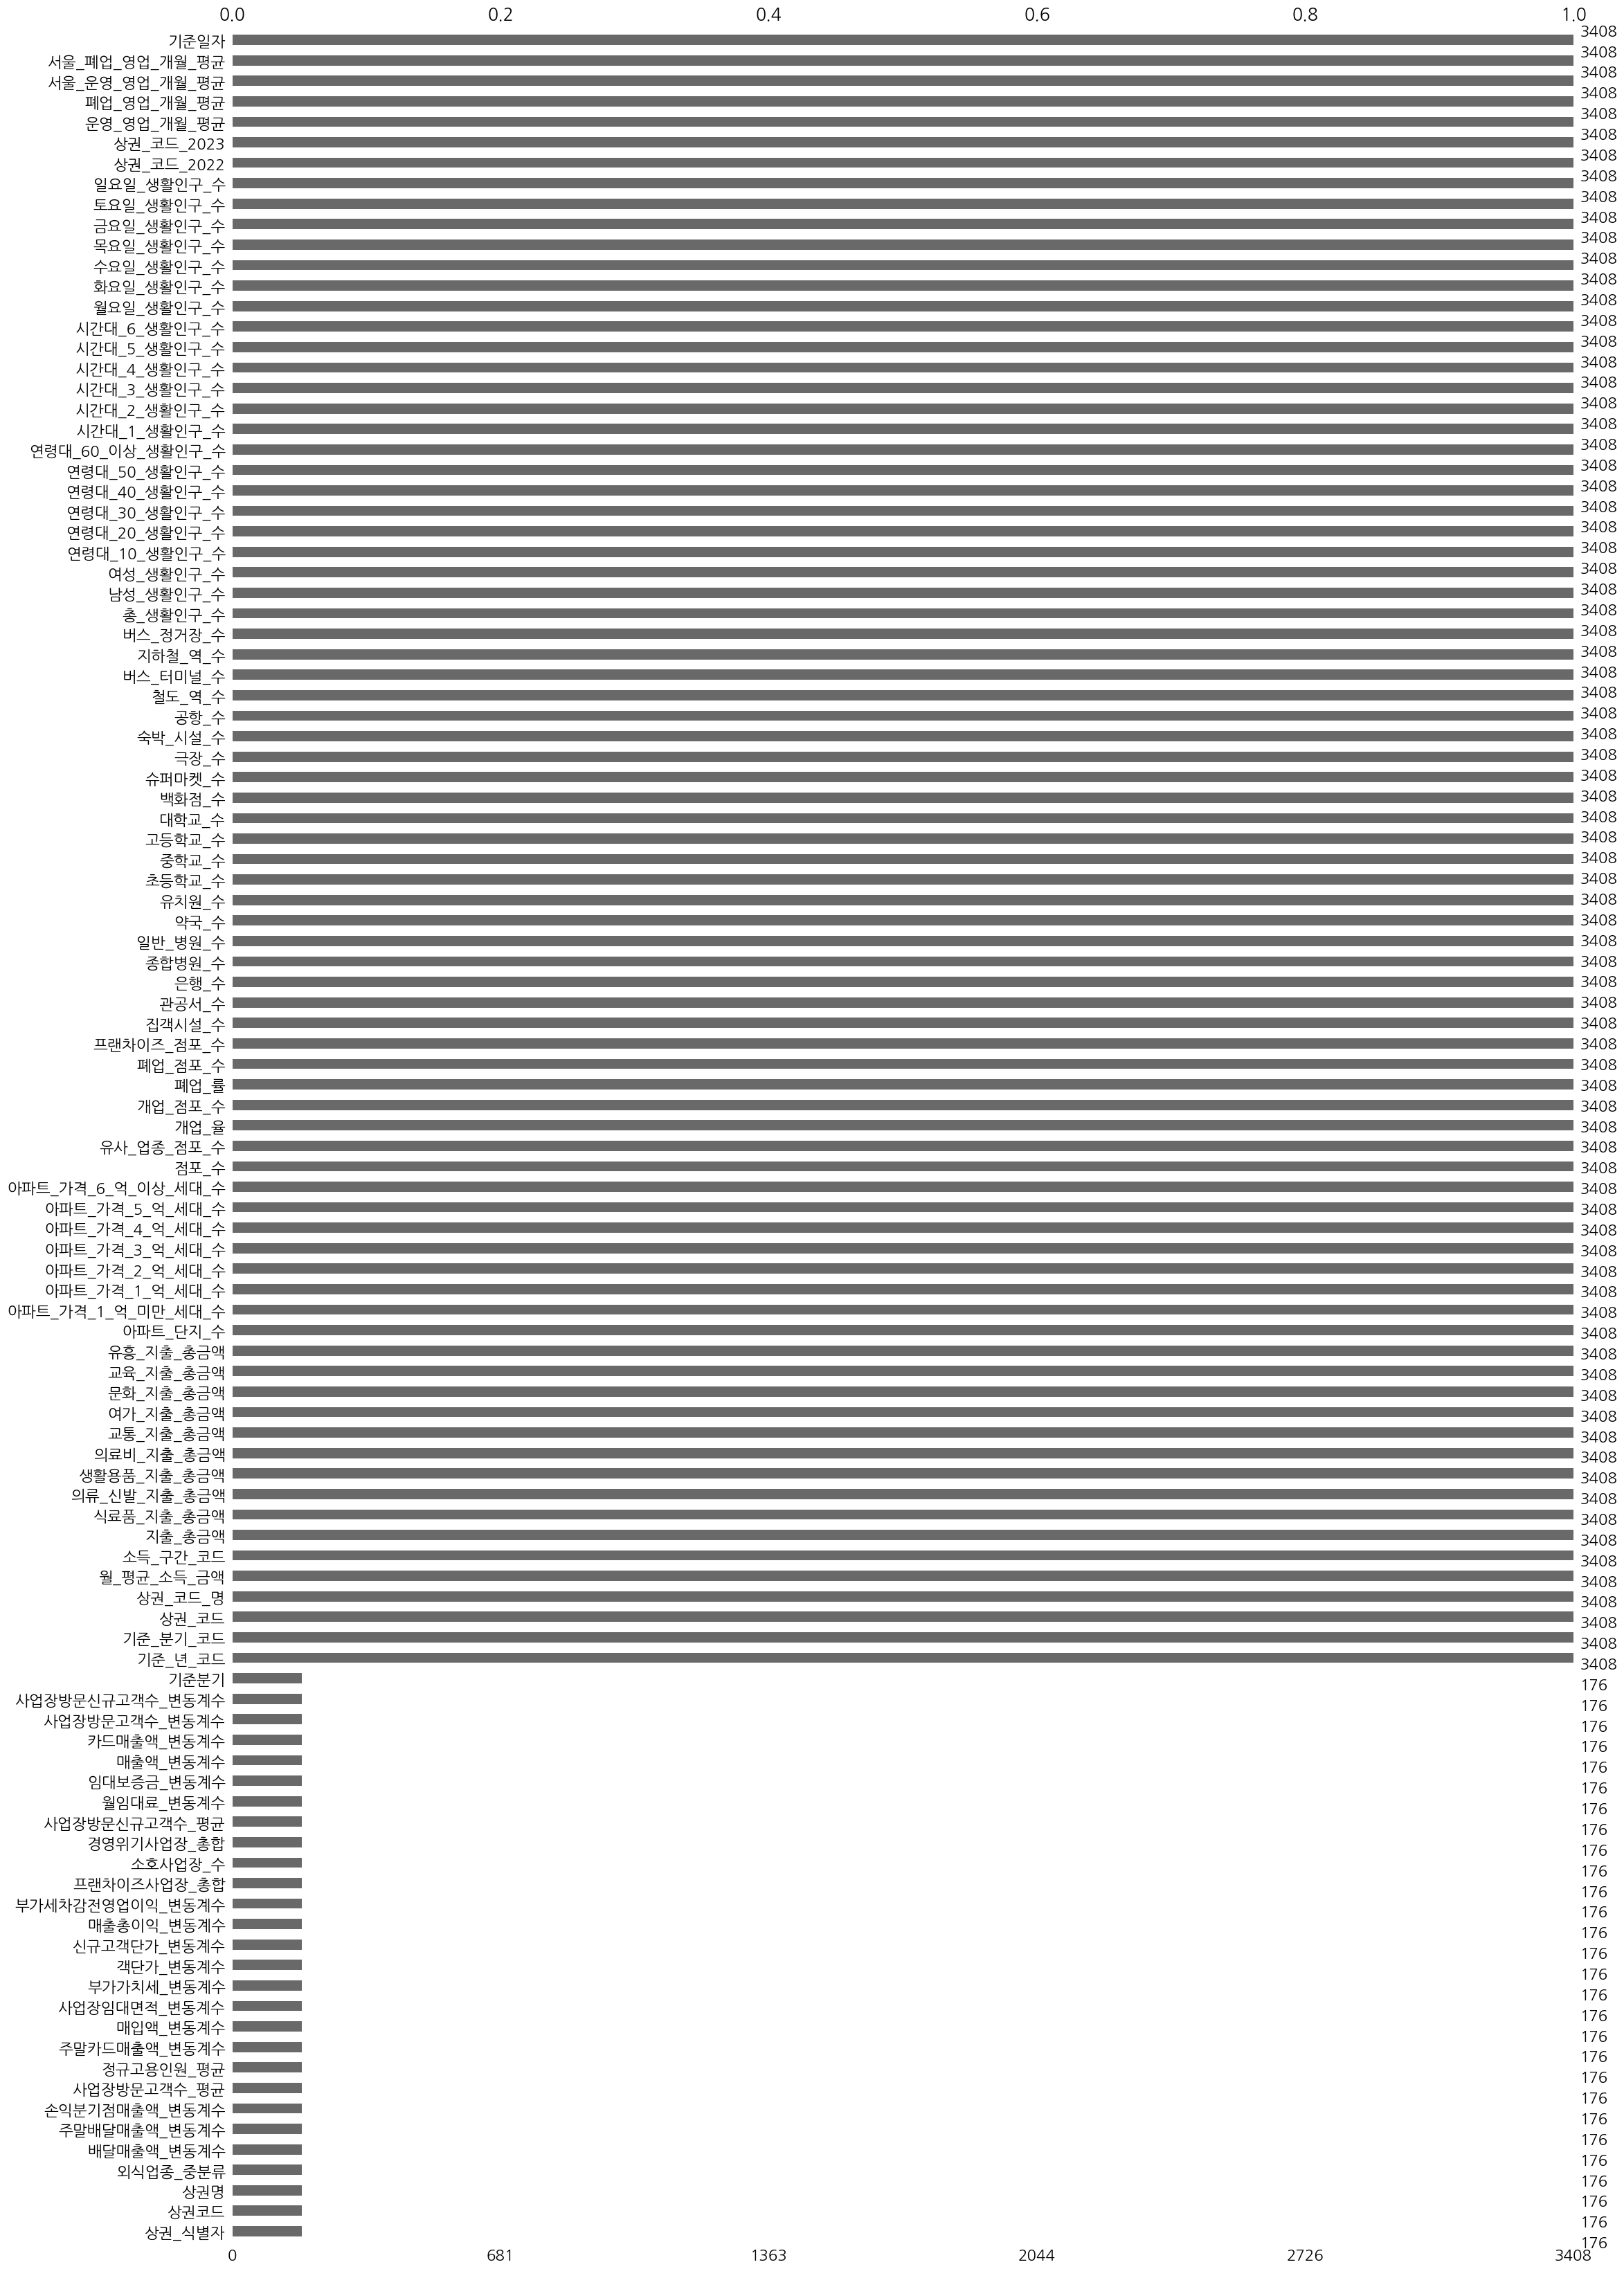

In [29]:
msno.bar(MERGE_LIST[0])